In [3]:
# Les librairies
import pandas as pd 

In [4]:
#Importer les données 
df = pd.read_csv("donnees_marketing_banque.csv", sep=";")
df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,id1,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,id2,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,id3,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,id4,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,id5,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
#La liste des colonnes 
df.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
#Nombre de lignes et de colonnes 
df.shape

(45211, 18)

In [7]:
# Voir les types de données
df.dtypes

id            object
age            int64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
y             object
dtype: object

In [8]:
#Statistiques descriptives
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45206.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.931477,1362.403707,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.623372,3044.906741,8.322476,257.527812,3.098021,100.128746,2.303441
min,10.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
#Les modalités de la variable education
df["education"].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [10]:
#Répartition des clients selon le niveau d'éducation 
df["education"].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

<Axes: xlabel='education'>

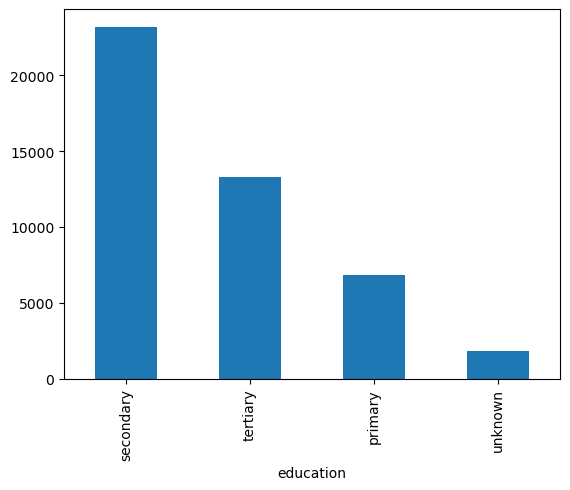

In [11]:
#Graphique de la répartition des clients selon le niveau d'éducation 
df["education"].value_counts().plot(kind="bar")

In [12]:
#Nettoyage des données 
#Nombre de données manquantes par variable
df.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      5
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [13]:
#Remplaçons les valeurs manquantes par la mediane de la variable balance 
df["balance"].fillna(df["balance"].median(), inplace=True)

In [14]:
#Selection de quelques variables 
selection=df[['age','loan','education']] 
selection.head()

,age,loan,education
0,58,no,tertiary
1,44,no,secondary
2,33,yes,secondary
3,47,no,unknown
4,33,no,unknown


In [15]:
base=df.copy()[df["age"]>=18]
base.head()
base.describe()


,age,balance,day,duration,campaign,pdays,previous
count,45203.000000,45203.000000,45203.000000,45203.000000,45203.000000,45203.000000,45203.000000
mean,40.936133,1362.530828,15.808331,258.168816,2.764153,40.205119,0.580426
std,10.618494,3044.973768,8.321971,257.548471,3.098206,100.136106,2.303632
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,449.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [16]:
base_2=df.copy()[(df["age"]>=18) & (df["education"]=="secondary")]
base_2.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,id2,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,id3,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
9,id10,43,technician,single,secondary,no,448.0,yes,no,unknown,5,may,55,1,-1,0,unknown,no
10,id11,41,admin.,divorced,secondary,no,270.0,yes,no,unknown,5,may,222,1,-1,0,unknown,no
11,id12,29,admin.,single,secondary,no,390.0,yes,no,unknown,5,may,137,1,-1,0,unknown,no


In [17]:
#Création d'une nouvelle variable conditionnelle en utilisant numpy 
import numpy as np
df["Tranche_age"]=np.nan 
df["Tranche_age"] [df["age"]<=18]="Moins_de_18_ans"
df["Tranche_age"] [(df["age"]>18)&(df["age"]<=45)]="Entre_18_45_ans"
df["Tranche_age"] [(df["age"]>45)]="Plus_de_45_ans" 
df["Tranche_age"].value_counts() 
df

C:\Users\abdou\AppData\Local\Temp\ipykernel_2492\57509066.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Tranche_age"] [df["age"]<=18]="Moins_de_18_ans"


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Tranche_age
0,id1,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Plus_de_45_ans
1,id2,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Entre_18_45_ans
2,id3,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Entre_18_45_ans
3,id4,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Plus_de_45_ans
4,id5,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no,Entre_18_45_ans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,id45207,51,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,Plus_de_45_ans
45207,id45208,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,Plus_de_45_ans
45208,id45209,72,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success,yes,Plus_de_45_ans
45209,id45210,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no,Plus_de_45_ans


<Axes: xlabel='Tranche_age'>

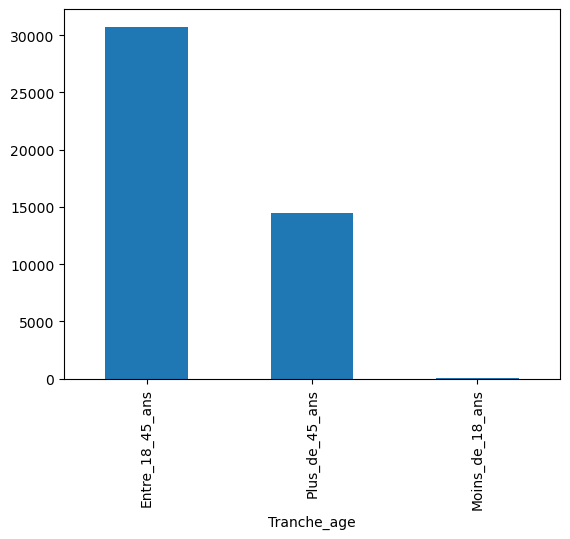

In [18]:
#Nombre de clients par tranche d'âge
df["Tranche_age"].value_counts().plot.bar()

In [19]:
#Solde moyen par Tranche d'age
agg=df.groupby("Tranche_age")
agg["balance"].mean().round(2)

Tranche_age
Entre_18_45_ans    1214.54
Moins_de_18_ans     252.50
Plus_de_45_ans     1678.34
Name: balance, dtype: float64

In [20]:
#Age moyen par niveau d'éducation pour les clients ayant plus de 25 ans
filtre=df[df["age"]>=25] 
filtre.groupby("education") ["age"] .mean().round(2)

education
primary      46.12
secondary    40.39
tertiary     39.72
unknown      45.55
Name: age, dtype: float64

Visualisation des données

Analyse Univariée

Variables Quantitatives

Pour analyser ou visualiser des variables quantitatives il faut toujours établir trois graphiques qui sont: 

- L'histogramme 
- Le Boxplot 
- La courbe de densité (kdeplot avec seaborn) 

<Figure size 1000x1000 with 0 Axes>

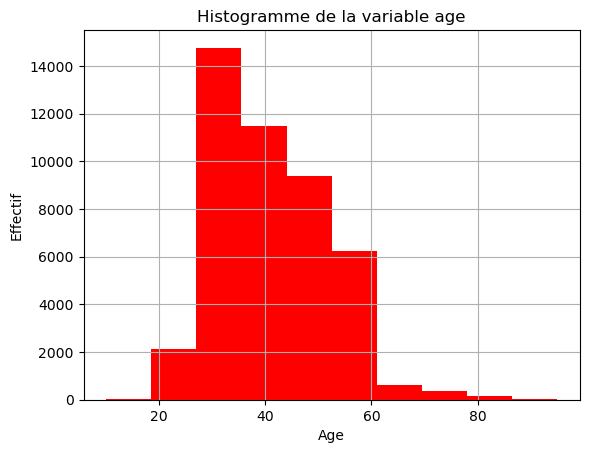

<Figure size 1000x1000 with 0 Axes>

In [21]:
#Histogramme de la variable age 
import matplotlib.pyplot as plt 
plt.hist(df["age"], color="red") 
plt.title("Histogramme de la variable age")
plt.xlabel("Age") 
plt.ylabel("Effectif") 
plt.grid(True)
plt.figure(figsize=(10,10))

Text(0.5, 1.0, 'Boxplot de la variable age')

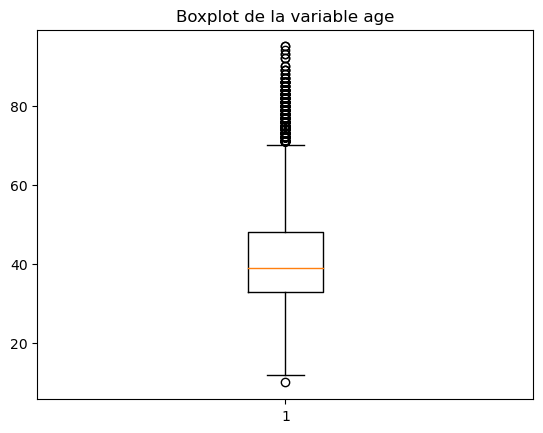

In [22]:
#Boxplot de la variable age avec matplotlib
plt.boxplot(df["age"])
plt.title("Boxplot de la variable age")

Boxplot avec Seaborn 

<Axes: >

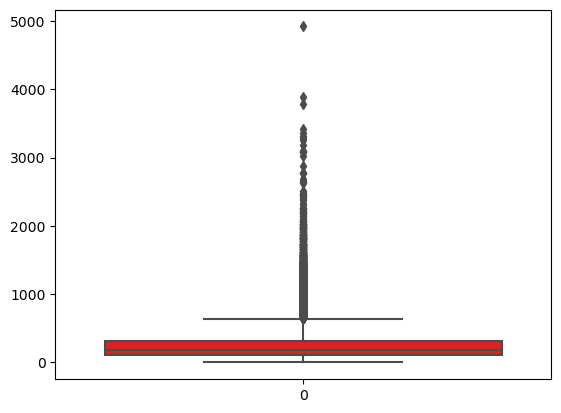

In [23]:
#Boxplot de la variable age avec seaborn 
import seaborn as sns 
sns.boxplot(df["duration"], color="red")

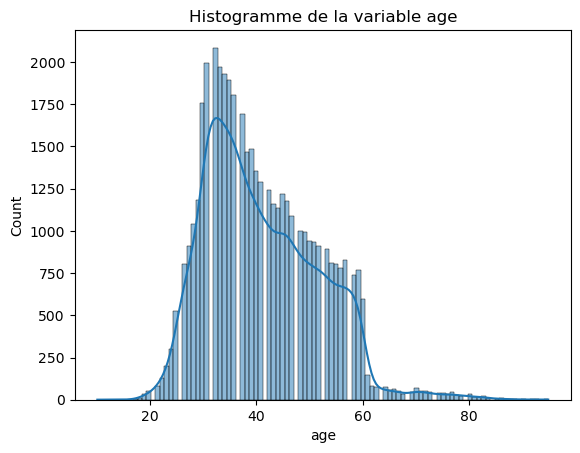

In [24]:
sns.histplot(df["age"],kde=True)
plt.title("Histogramme de la variable age")
plt.show()

<Figure size 1000x1000 with 0 Axes>

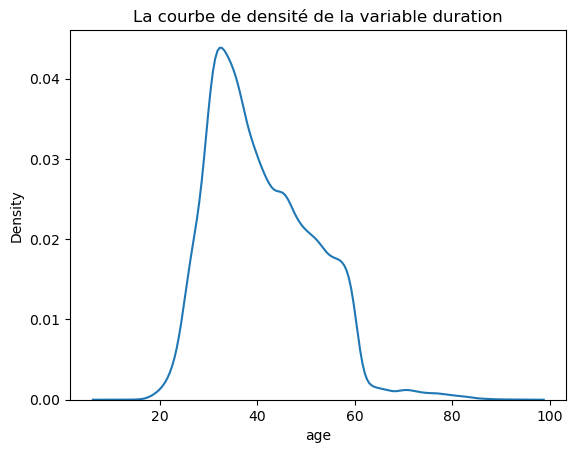

<Figure size 1000x1000 with 0 Axes>

In [25]:
#La courbe de densité avec seaborn 
sns.kdeplot(df["age"])
plt.title("La courbe de densité de la variable duration")
plt.figure(figsize=(10,10))

Variables Qualitatives 

Toujours effectuer un value_counts() sur la variable qualitatives à visualiser et ensuite transformer la serie en dataframme pour mieux manipuler la table.

NB: Les graphiques recommandés sont les suivants: 

- Diagramme circulaire (pie chart) à utiliser lorsque la variable contient peu de modalités 
- Diagramme en barre (barplot/ plt.ba()) à utiliser lorsque la variable contient plusieurs de modalités

Barplot avec matplotlib

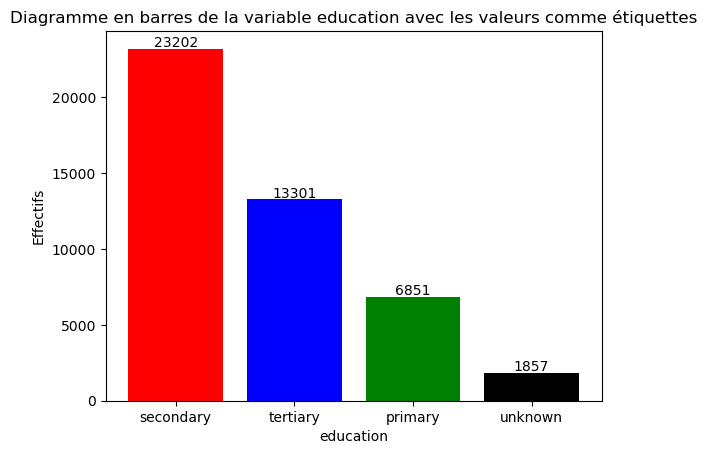

In [26]:

#Diagramme en barres de la variable education 
col=["red","blue","green","black"]
effectifs=df["education"].value_counts().reset_index() #rest_index() permet de transformer la série en dataframe
plt.bar(effectifs["education"],effectifs["count"],color=col)
#Ajout des étiquettes
for i, freq in enumerate(effectifs["count"]):
    plt.text(i,freq+100,freq,ha="center")
plt.title("Diagramme en barres de la variable education avec les valeurs comme étiquettes")
plt.xlabel("education")
plt.ylabel("Effectifs")
plt.show()

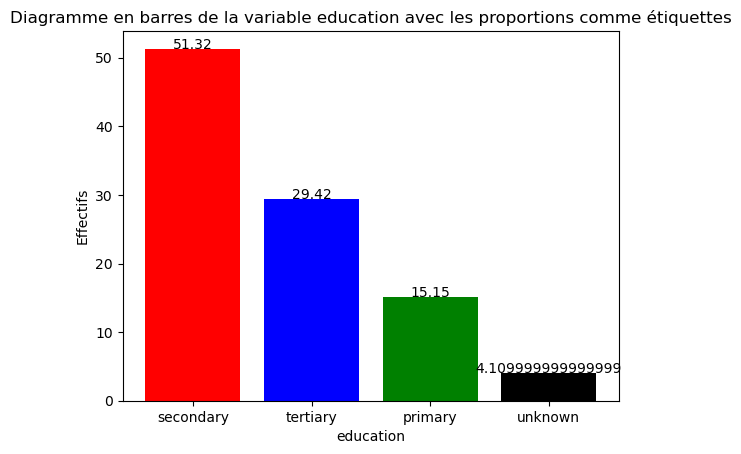

In [27]:
#Diagramme en barre avec les proportions commme ethiquetes 
effectifs["proportion"]=(effectifs["count"]/effectifs["count"].sum()).round(4)*100 #création de la variable proportion pour chaque niveau d'éducation
plt.bar(effectifs["education"],effectifs["proportion"],color=col)
#Ajout des étiquettes
for i,freq in enumerate(effectifs["proportion"]):
    plt.text(i,freq,str(freq),ha="center")
plt.title("Diagramme en barres de la variable education avec les proportions comme étiquettes")
plt.xlabel("education")
plt.ylabel("Effectifs")
plt.show()

Barplot avec Seaborn

Text(0.5, 1.0, 'Diagramme en barres de la variable education avec les étiquettes de données')

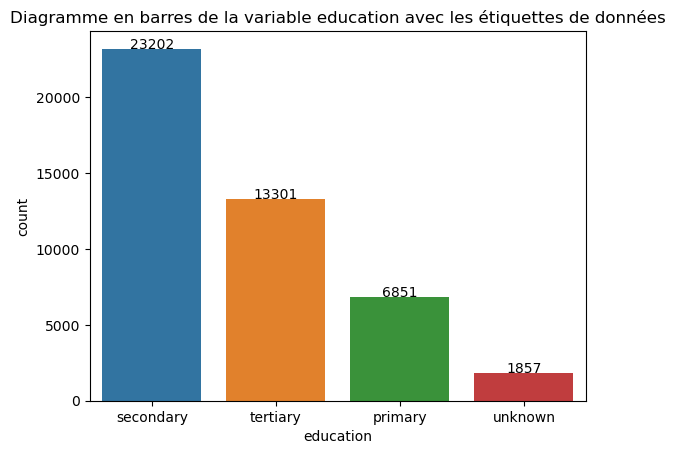

In [28]:
sns.barplot(x="education",y="count",data=effectifs)
for i,freq in enumerate(effectifs["count"]):
    plt.text(i,freq,str(freq),ha="center") 
plt.title("Diagramme en barres de la variable education avec les étiquettes de données")

Text(0.5, 1.0, 'Diagramme en barres de la variable education avec les proportions étiquettes en pourcentage')

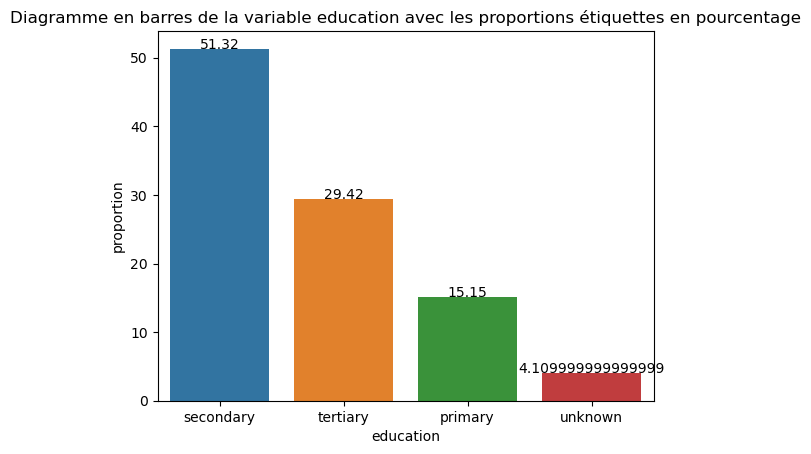

In [29]:
sns.barplot(x="education",y="proportion",data=effectifs) 
for i,freq in enumerate(effectifs["proportion"]):
    plt.text(i,freq,str(freq),ha="center") 
plt.title("Diagramme en barres de la variable education avec les proportions étiquettes en pourcentage")


Pie Plot

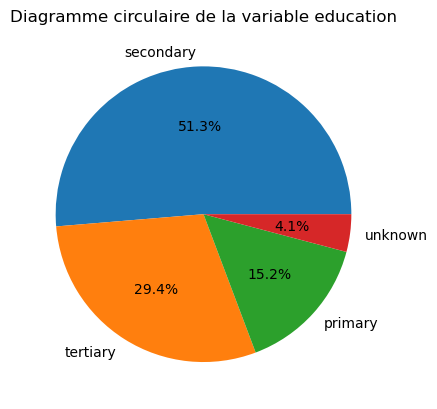

In [30]:
#Graphique circulaire de la variable education avec matplotlib
plt.pie(effectifs["count"],labels=effectifs["education"],autopct="%1.1f%%") 
plt.title("Diagramme circulaire de la variable education")
plt.show()

Analyse Bivariée

On utilise le boxplot bivarié entre la variable quantitative et la variable qualitative

Boxplot bivariée entre une variable quantitative et une variable qualitative 

<Axes: xlabel='y', ylabel='duration'>

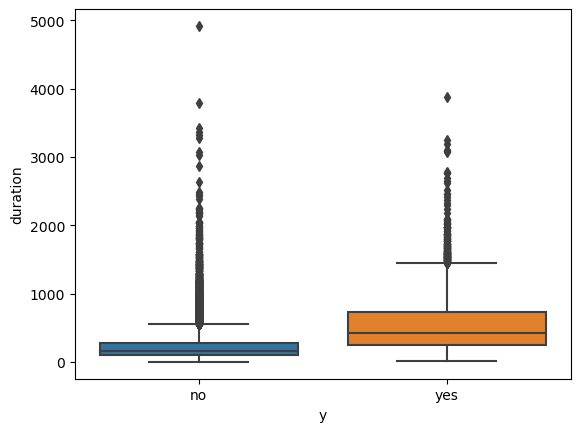

In [31]:
sns.boxplot(x=df["y"],y=df["duration"],data=df)

<Axes: xlabel='y', ylabel='duration'>

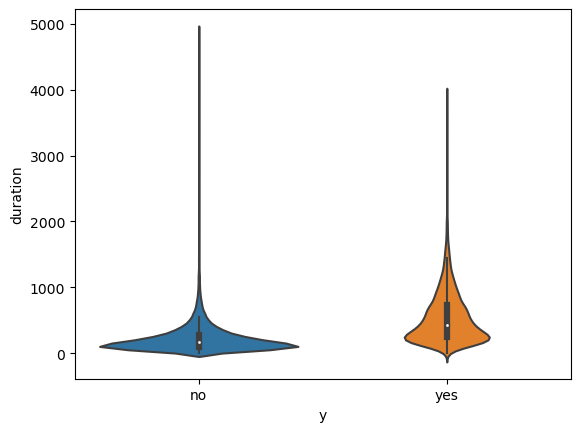

In [32]:
sns.violinplot(x=df["y"],y=df["duration"],data=df)

Analyse bivariée entre deux variables qualitatives: On fait un barplot après avoir crée un tableau de contigence

<Axes: xlabel='y', ylabel='count'>

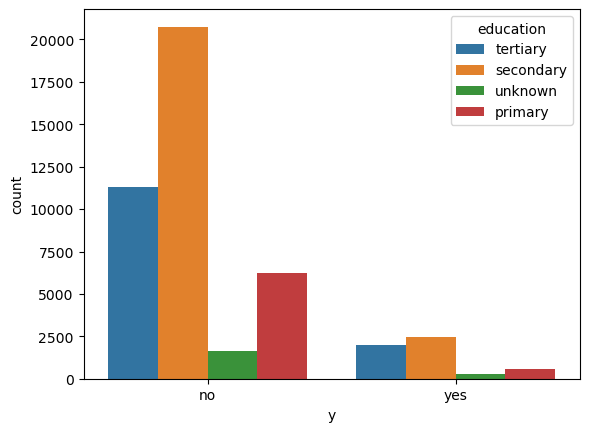

In [39]:
#Analyse bivariée entre  les variables qualitatives y et education
table_contingence = pd.crosstab(df["y"],df["education"])
table_contingence 
sns.countplot(x="y",hue="education",data=df)


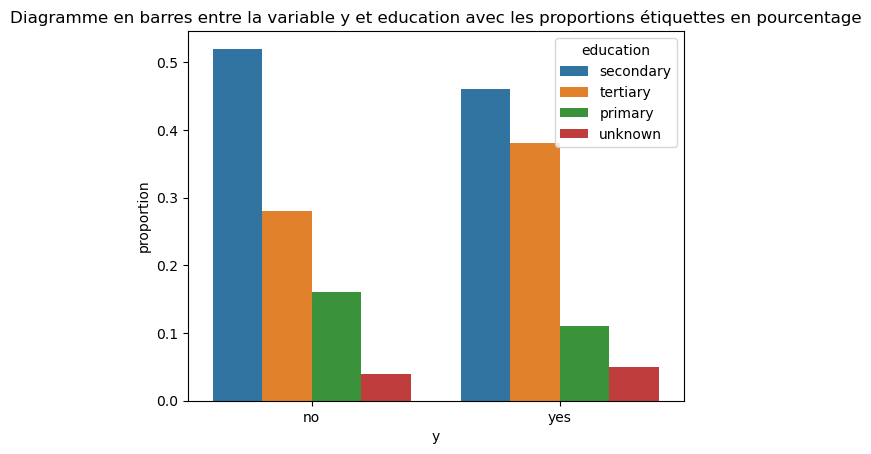

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [47]:
#2eme méthode
#Tableau de proportion  
prop_table=df.groupby(df["y"]) ["education"].value_counts(normalize=True).round(2).reset_index(name="proportion") 
prop_table 

sns.barplot(x="y",y="proportion",hue="education",data=prop_table)
#Ajout des étiquettes 
plt.title("Diagramme en barres entre la variable y et education avec les proportions étiquettes en pourcentage") 
plt.show()
plt.figure(figsize=(10,10))

Analyse bivariée entre deux variables quantitatives: On fait un scatterplot ou une heatmap après avoir crée un tableau de contigence

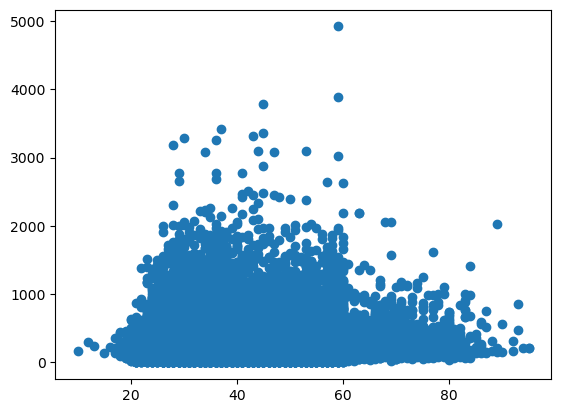

In [48]:
#Scatter plot entre les variables quantitatives age et duration 
plt.scatter(df["age"],df["duration"])

<Axes: xlabel='age', ylabel='duration'>

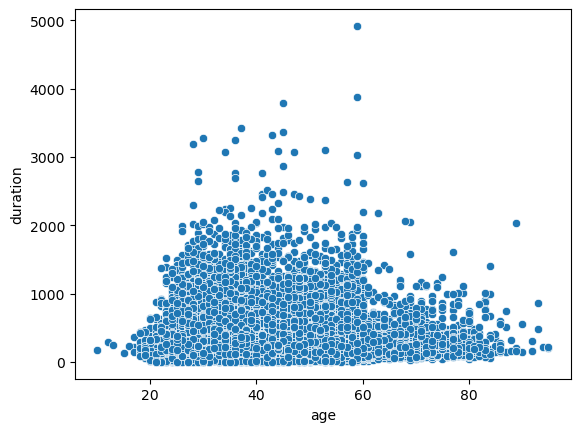

In [53]:
#Scatter plot entre les variables quantitatives age et duration avec seaborn
sns.scatterplot(x=df["age"],y=df["duration"],data=df)

<Axes: >

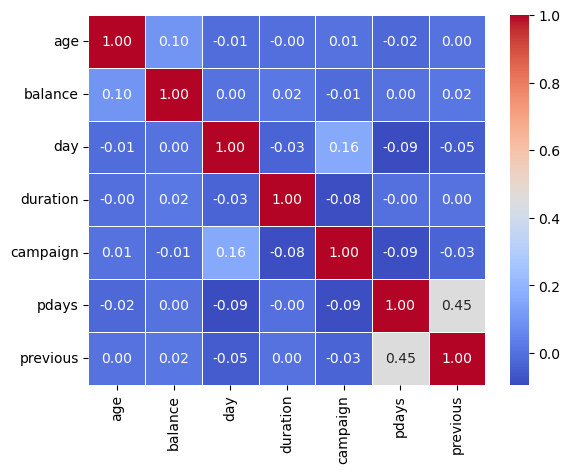

In [58]:
#Construction d'une matrice de corrélation avec seaborn 
var_quant=df.select_dtypes(include=["int64","float64"]).columns
var_quant 

#Création d'un dataframe contenant uniquement les variables quantitatives
df_quant=df[var_quant]
df_quant.head() 

#Calcul de la matrice de corrélation 
mat_corr=df_quant.corr()
mat_corr

#La heatmap des variables quantitatives avec seaborn
sns.heatmap(mat_corr,annot=True,cmap="coolwarm",fmt=".2f",linewidths=0.5)

c:\Users\abdou\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


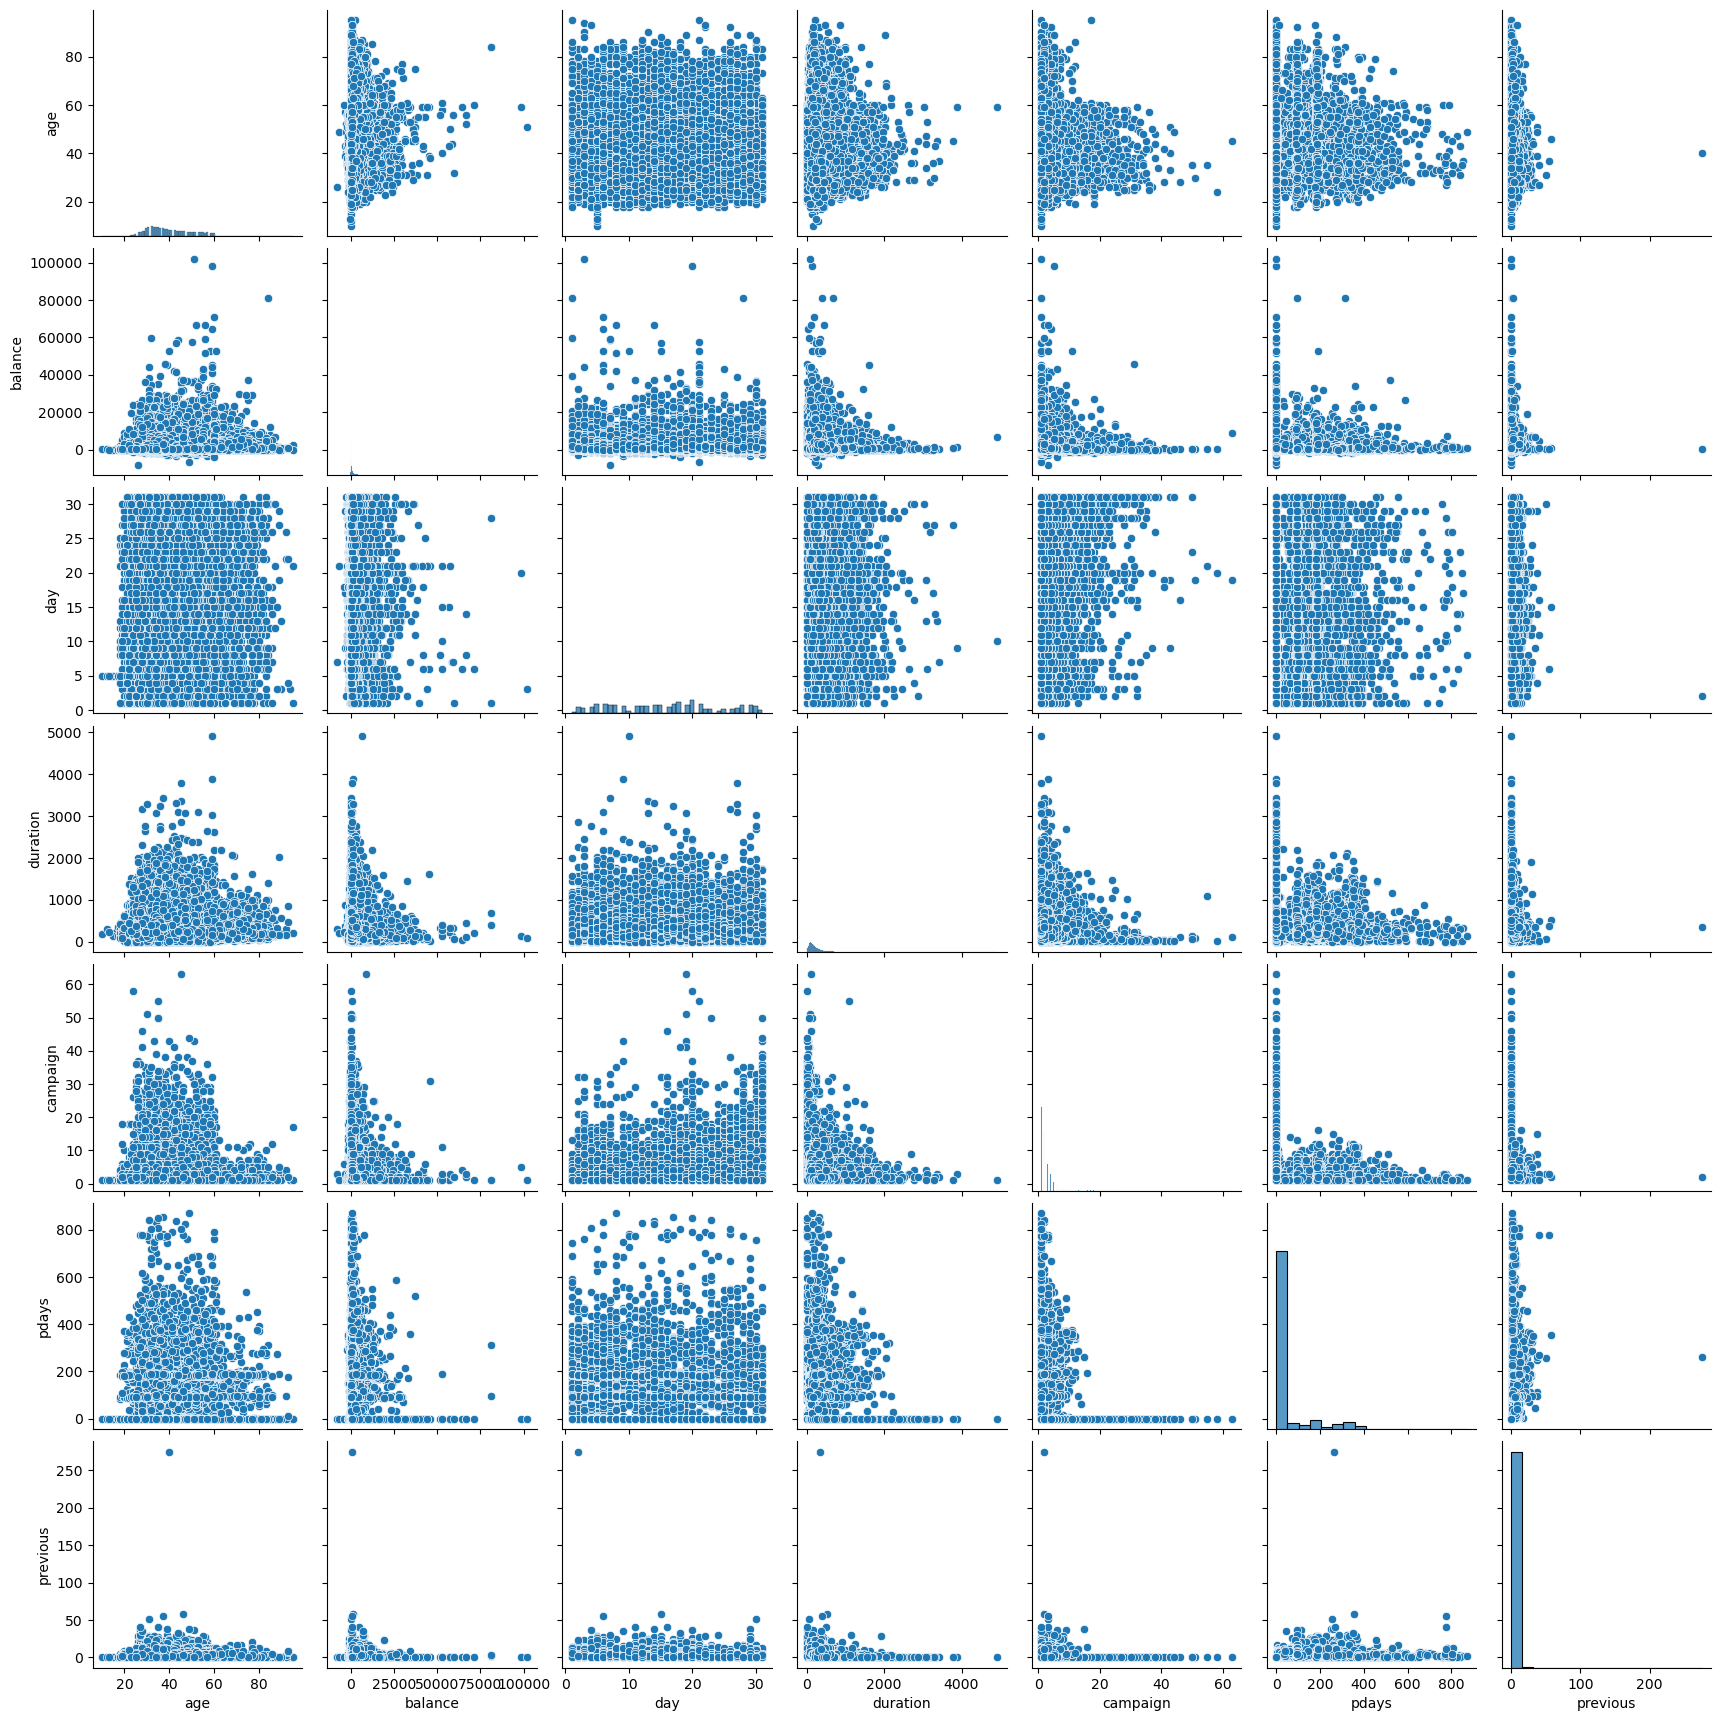

In [59]:
#visualisation des relations entre toutes les variables de la base de données
sns.pairplot(df) 

c:\Users\abdou\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


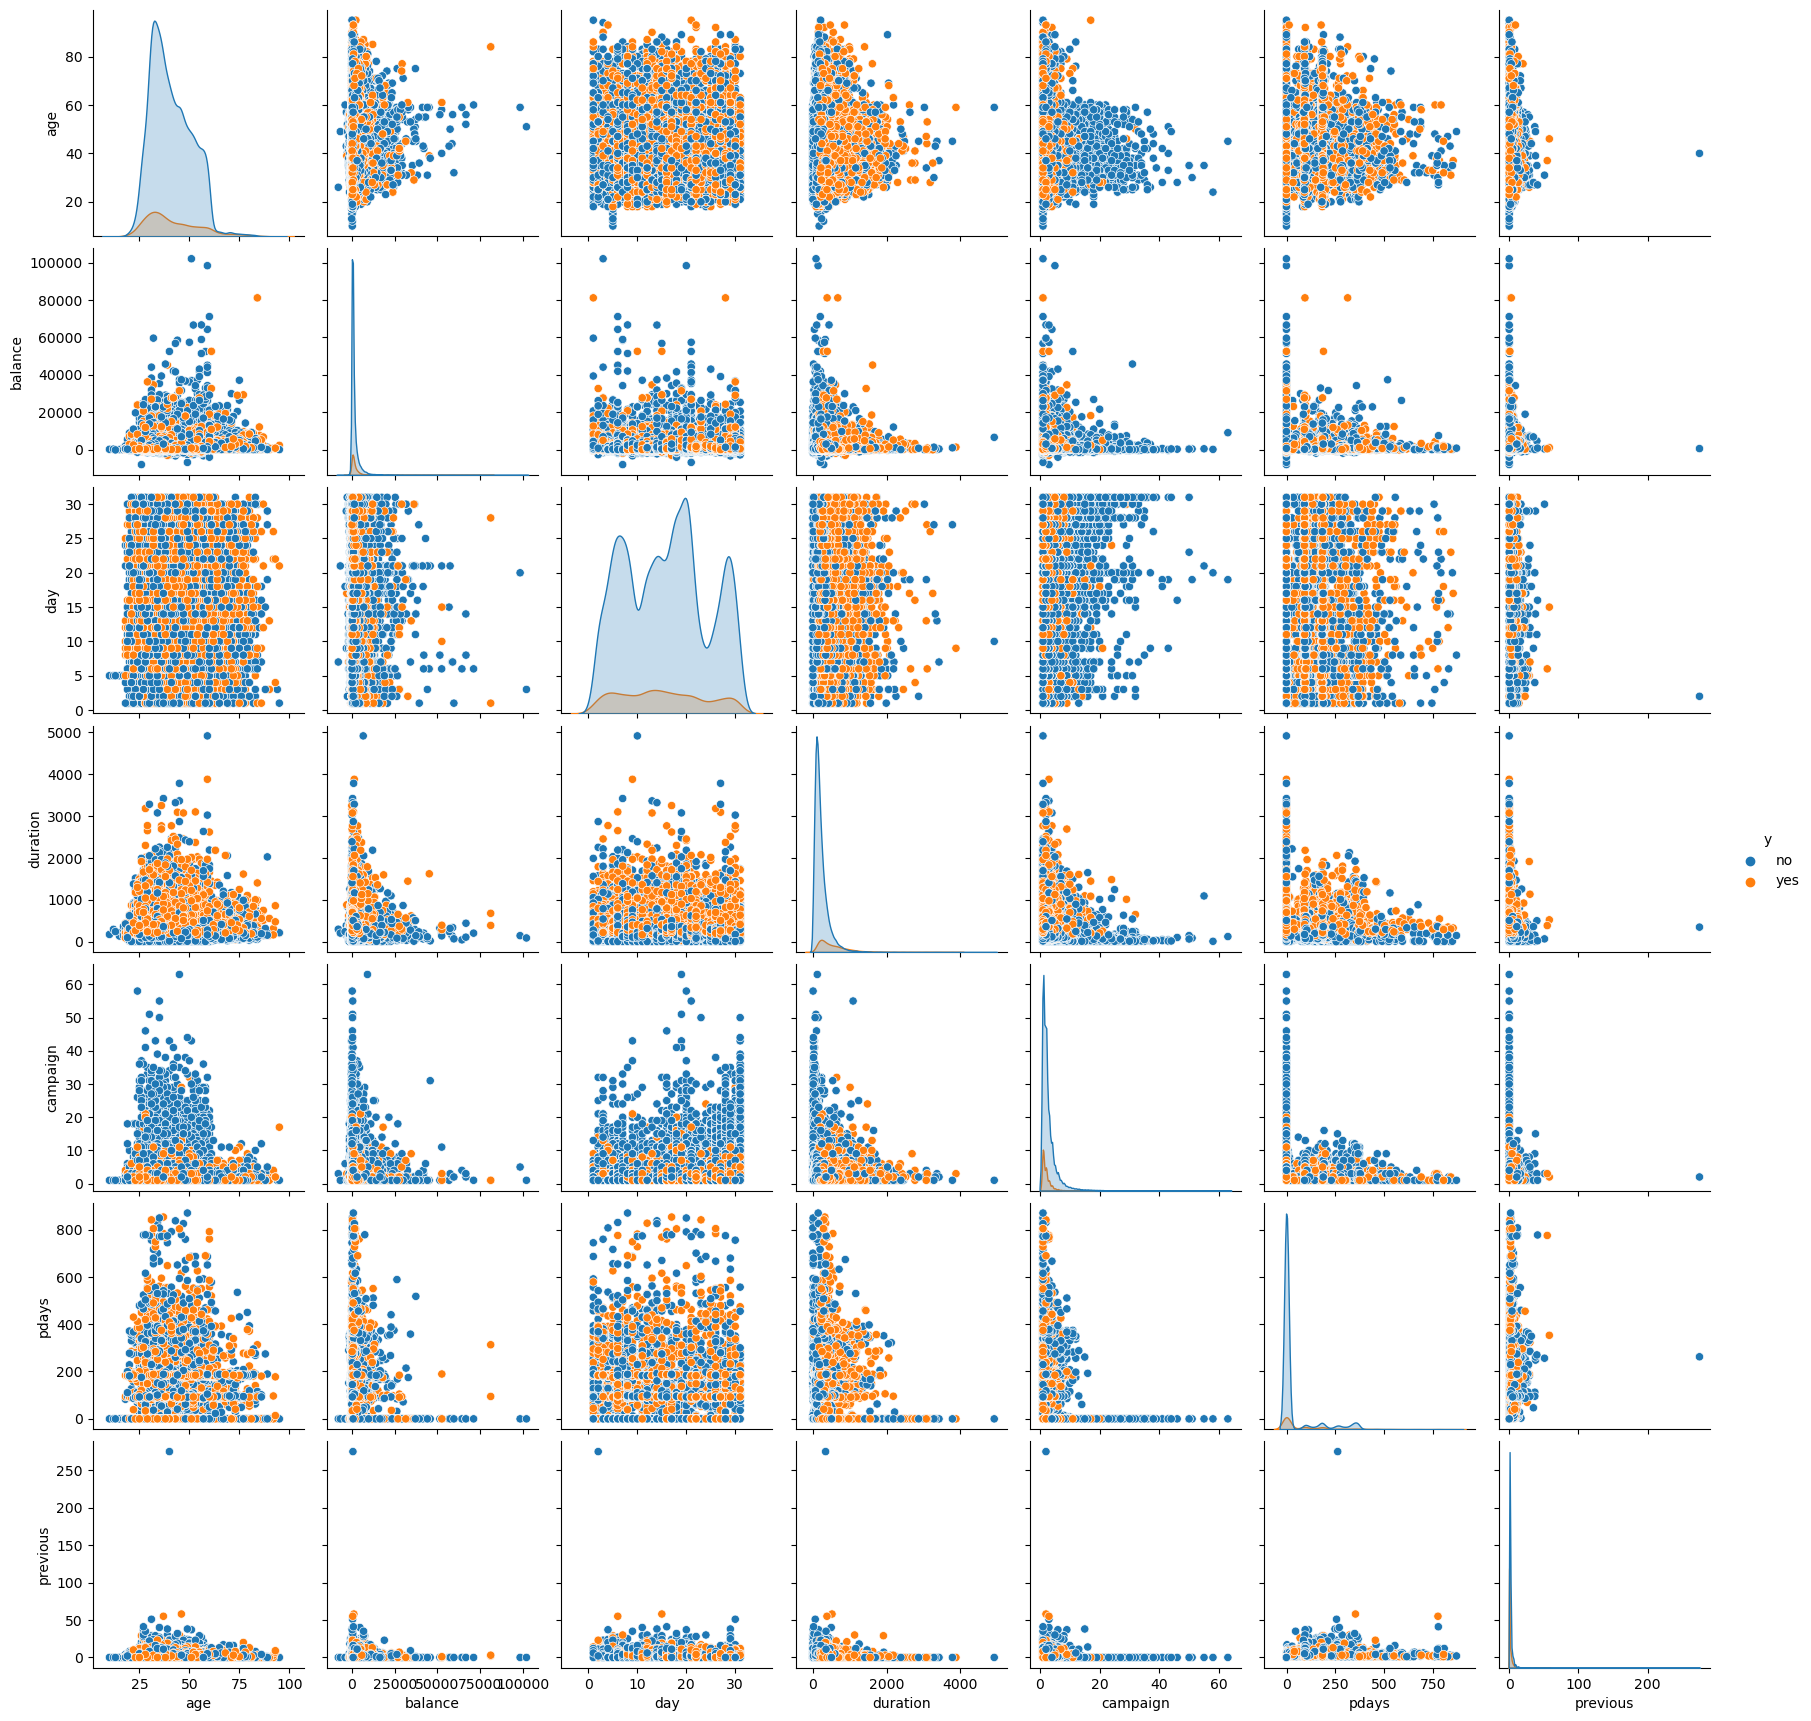

In [60]:
#visualisation des relations entre toutes les variables de la base de données en fonction de la variable y
sns.pairplot(df,hue="y") 

In [ ]:
import os
import pandas as pd

# Directory path containing the CSV files
directory = 'path/to/directory'

# Initialize an empty DataFrame to store the consolidated data
consolidated_df = pd.DataFrame()

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Append the DataFrame to the consolidated DataFrame
        consolidated_df = consolidated_df.append(df, ignore_index=True)

# Save the consolidated DataFrame to a new CSV file
consolidated_df.to_csv('consolidated_data.csv', index=False)


In [ ]:
import pandas as pd

def getData(button):
    print("Import Data")
    
    # Disable automatic calculation and screen updating
    pd.set_option('mode.chained_assignment', None)
    pd.set_option('display.update', False)
    
    # Initialize variables
    shNew = pd.DataFrame()
    bEXT, bZ, bIntercos, b419 = False, False, False, False
    arrReport = []
    sReport = input("Are you sure you want to run the overdue report? (Y/N): ")
    
    if sReport.upper() != "Y":
        return
    
    # Clean the application by removing old reporting sheets
    print("Clean the application by removing old reporting sheets.")
    
    # Add new sheets if they don't exist
    if not bEXT:
        shEXT = pd.DataFrame()
        bEXT = True
    
    if not bZ:
        shZ = pd.DataFrame()
        bZ = True
    
    if not bIntercos:
        shIntercos = pd.DataFrame()
        bIntercos = True
    
    if not b419:
        sh419 = pd.DataFrame()
        b419 = True
    
    # Start data import
    print("Start data import.")
    importData()
    
    # Enable automatic calculation and screen updating
    pd.set_option('mode.chained_assignment', 'warn')
    pd.set_option('display.update', True)
    
    print("Data import completed.")

def importData():
    # Import data logic goes here
    # You can add your data import code here
    # For example:
    # df = pd.read_csv('data.csv')
    pass

# Call the getData function
getData(None)
